In [9]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [25]:
df = pd.read_csv("crash_data_only_numeric_values.csv")
df.head()

,CRASH_YEAR,NUM_LANES,SPD_LIM,CRASH_SEV_CODE,MULTI_VEH_CODE,HOLIDAY_CODE,LG_REGION_DESC_CODE,JUNCTION_TYPE_CODE,DIRN_ROLE1_DESC_CODE,INTSN_MIDBLOCK_CODE,FLAT_HILL_CODE,ROAD_CURVATURE_CODE,ROAD_MARKINGS_CODE,ROAD_SURFACE_CODE,ROAD_WET_CODE,URBAN_CODE,LIGHT_CODE,STREET_LIGHT_CODE,WEATHER_A_CODE,TRAFFIC_CTRL
0,2000,6,50,0,5,0,1,3,3,0,0,0,5,0,0,1,1,2,0,Traffic Signal
1,2000,2,100,0,2,0,8,4,2,1,0,3,0,0,0,0,0,0,0,Nil
2,2000,3,100,0,2,0,12,4,2,1,0,3,2,0,0,0,2,0,0,Nil
3,2000,2,100,0,2,0,12,4,3,1,0,3,0,0,0,0,0,0,0,Nil
4,2000,2,70,0,2,3,2,3,5,0,0,3,0,0,0,1,1,2,0,Nil


Text(0, 0.5, 'NUM_LANES')

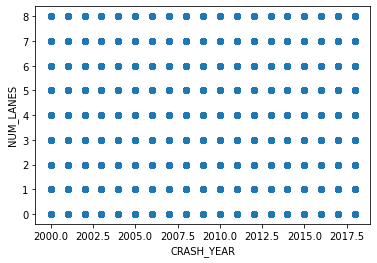

In [19]:
plt.scatter(df.CRASH_YEAR, df['NUM_LANES'])
plt.xlabel('CRASH_YEAR')
plt.ylabel('NUM_LANES')

In [22]:
for col in df.columns: 
    print("'" + col + "'" + ", ") 

'CRASH_YEAR', 
'NUM_LANES', 
'SPD_LIM', 
'TRAFFIC_CTRL_Give Way Sign', 
'TRAFFIC_CTRL_Nil', 
'TRAFFIC_CTRL_Points Man', 
'TRAFFIC_CTRL_School Patrol', 
'TRAFFIC_CTRL_Stop Sign', 
'TRAFFIC_CTRL_Traffic Signal', 
'CRASH_SEV_F', 
'CRASH_SEV_M', 
'CRASH_SEV_N', 
'CRASH_SEV_S', 
'MULTI_VEH_Cyclist(s)+Pedestrian(s) only', 
'MULTI_VEH_Cyclists only', 
'MULTI_VEH_Multi vehicle', 
'MULTI_VEH_Other', 
'MULTI_VEH_Others without non-parked veh', 
'MULTI_VEH_Single vehicle', 
'MULTI_VEH_Vehicle(s)+Cyclist(s) only', 
'MULTI_VEH_Vehicle(s)+Pedestrian(s)', 
'MULTI_VEH_Vehicle(s)+multiple other types', 
'HOLIDAY_Christmas/New Year', 
'HOLIDAY_Easter', 
'HOLIDAY_Labour Weekend', 
'HOLIDAY_None', 
'HOLIDAY_Queens Birthday', 
'LG_REGION_DESC_0', 
'LG_REGION_DESC_Auckland            ', 
'LG_REGION_DESC_Bay of Plenty       ', 
'LG_REGION_DESC_Canterbury          ', 
'LG_REGION_DESC_Gisborne            ', 
'LG_REGION_DESC_Hawkes Bay          ', 
'LG_REGION_DESC_Manawatu/Wanganui   ', 
'LG_REGION_DESC_Nelson/

In [23]:
km = KMeans(n_clusters=3)
km
y_predicted = km.fit_predict(df[['CRASH_YEAR', 'NUM_LANES', 'SPD_LIM', 'TRAFFIC_CTRL_Give Way Sign', 'TRAFFIC_CTRL_Nil', 'TRAFFIC_CTRL_Points Man', 'TRAFFIC_CTRL_School Patrol', 'TRAFFIC_CTRL_Stop Sign', 'TRAFFIC_CTRL_Traffic Signal', 'CRASH_SEV_F', 'CRASH_SEV_M', 'CRASH_SEV_N', 'CRASH_SEV_S', 'MULTI_VEH_Cyclist(s)+Pedestrian(s) only', 'MULTI_VEH_Cyclists only', 'MULTI_VEH_Multi vehicle', 'MULTI_VEH_Other', 'MULTI_VEH_Others without non-parked veh', 'MULTI_VEH_Single vehicle', 'MULTI_VEH_Vehicle(s)+Cyclist(s) only', 'MULTI_VEH_Vehicle(s)+Pedestrian(s)', 'MULTI_VEH_Vehicle(s)+multiple other types', 'HOLIDAY_Christmas/New Year', 'HOLIDAY_Easter', 'HOLIDAY_Labour Weekend', 'HOLIDAY_None', 'HOLIDAY_Queens Birthday', 'LG_REGION_DESC_0', 'LG_REGION_DESC_Auckland', 'LG_REGION_DESC_Bay of Plenty', 'LG_REGION_DESC_Canterbury', 'LG_REGION_DESC_Gisborne', 'LG_REGION_DESC_Hawkes Bay', 'LG_REGION_DESC_Manawatu/Wanganui', 'LG_REGION_DESC_Nelson/Marlborough', 'LG_REGION_DESC_Northland', 'LG_REGION_DESC_Otago', 'LG_REGION_DESC_Southland', 'LG_REGION_DESC_Taranak', 'LG_REGION_DESC_Waikato', 'LG_REGION_DESC_Wellington', 'LG_REGION_DESC_West Coast', 'JUNCTION_TYPE_Driveway', 'JUNCTION_TYPE_Multi Rd Join', 'JUNCTION_TYPE_Roundabout', 'JUNCTION_TYPE_T Type Junction', 'JUNCTION_TYPE_Unknown', 'JUNCTION_TYPE_X Type Junction', 'JUNCTION_TYPE_Y Type Junction', 'DIRN_ROLE1_DESC_0', 'DIRN_ROLE1_DESC_East', 'DIRN_ROLE1_DESC_North', 'DIRN_ROLE1_DESC_South', 'DIRN_ROLE1_DESC_Unknown', 'DIRN_ROLE1_DESC_West', 'INTSN_MIDBLOCK_Intersection', 'INTSN_MIDBLOCK_Mid Block', 'FLAT_HILL_Flat', 'FLAT_HILL_Hill', 'FLAT_HILL_Unknown', 'ROAD_CURVATURE_Easy Curve', 'ROAD_CURVATURE_Moderate Curve', 'ROAD_CURVATURE_Severe Curve', 'ROAD_CURVATURE_Straight Road', 'ROAD_CURVATURE_Unknown', 'ROAD_MARKINGS_Centre Line', 'ROAD_MARKINGS_No Marks', 'ROAD_MARKINGS_No Passing Lines', 'ROAD_MARKINGS_Painted Island', 'ROAD_MARKINGS_Ped Crossing', 'ROAD_MARKINGS_Raised Island', 'ROAD_MARKINGS_Unknown', 'ROAD_SURFACE_Sealed', 'ROAD_SURFACE_Unknown', 'ROAD_SURFACE_Unsealed', 'ROAD_WET_Dry', 'ROAD_WET_Ice/ Snow', 'ROAD_WET_Unknown', 'ROAD_WET_Wet', 'URBAN_Openroad', 'URBAN_Urban', 'LIGHT_Bright Sun', 'LIGHT_Dark', 'LIGHT_Overcast', 'LIGHT_Twilight', 'LIGHT_Unknown', 'STREET_LIGHT_None', 'STREET_LIGHT_Off', 'STREET_LIGHT_On', 'STREET_LIGHT_Unknown', 'WEATHER_A_Fine', 'WEATHER_A_Heavy Rain', 'WEATHER_A_Light Rain', 'WEATHER_A_Mist', 'WEATHER_A_Snow', 'WEATHER_A_Unknown']])
y_predicted

KeyError: "['LG_REGION_DESC_Southland', 'LG_REGION_DESC_Manawatu/Wanganui', 'LG_REGION_DESC_Nelson/Marlborough', 'LG_REGION_DESC_Auckland', 'LG_REGION_DESC_Waikato', 'LG_REGION_DESC_Hawkes Bay', 'LG_REGION_DESC_West Coast', 'LG_REGION_DESC_Gisborne', 'LG_REGION_DESC_Wellington', 'LG_REGION_DESC_Canterbury', 'LG_REGION_DESC_Bay of Plenty', 'LG_REGION_DESC_Taranak', 'LG_REGION_DESC_Otago', 'LG_REGION_DESC_Northland'] not in index"

In [ ]:
df['CLUSTER']=y_predicted
df.head()